<a href="https://colab.research.google.com/github/psykeefuego/EpiRecipes/blob/main/EpiRecipe_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of the EpiRecipes Dataset from Kaggle


In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge

from scripts import *

In [223]:
# importing the dataset
df = pd.read_csv('epi_r.csv')
df.head(3)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [224]:
# summarizing the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [225]:
# obtaining a statistical description
df.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [226]:
# counting the null values in the calories column
df.calories.isnull().sum()

4117

In [227]:
df.columns

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium', '#cakeweek',
       '#wasteless', '22-minute meals', '3-ingredient recipes',
       ...
       'yellow squash', 'yogurt', 'yonkers', 'yuca', 'zucchini', 'cookbooks',
       'leftovers', 'snack', 'snack week', 'turkey'],
      dtype='object', length=680)

In [228]:
# eliminating columns where calories > 10,000
df = df[(df.calories < 10000) | (df['calories'].isnull() == 1)]

In [229]:
# finding the mean of the calories column
calorie_mean = df.calories.mean()
calorie_mean

487.9006535126304

In [230]:
# filling in rows with null values using the mean
df.calories.fillna(calorie_mean, inplace=True)

In [231]:
df.calories.describe()

,calories
count,20031.000000
mean,487.900654
std,536.611756
min,0.000000
25%,229.000000
50%,445.000000
75%,502.000000
max,9831.000000


We can observe a change in the max value of the calories column.

# Data Analysis and Visualization

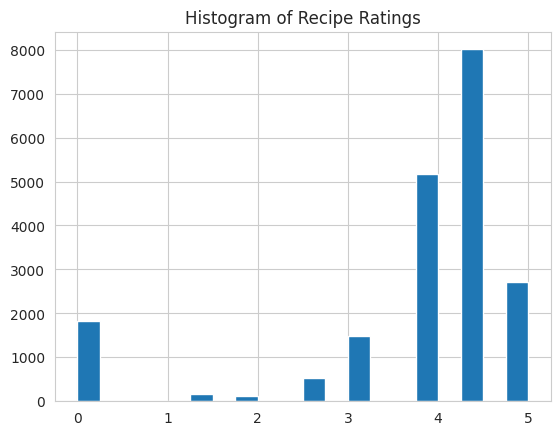

In [232]:
df.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

Text(0.5, 1.0, 'Rating Distribution')

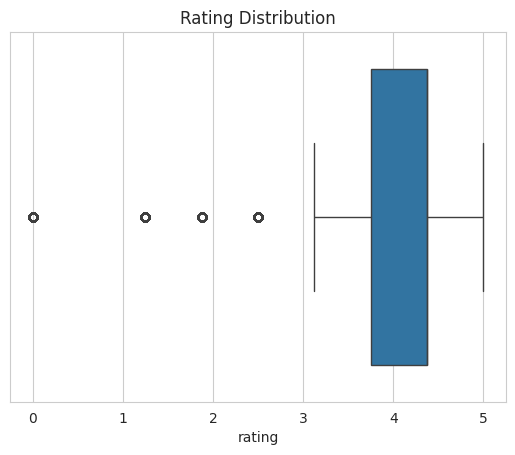

In [233]:
sns.set_style("whitegrid")
sns.boxplot(x=df['rating'])
plt.title("Rating Distribution")

In [234]:
df.rating.isnull().sum()

0

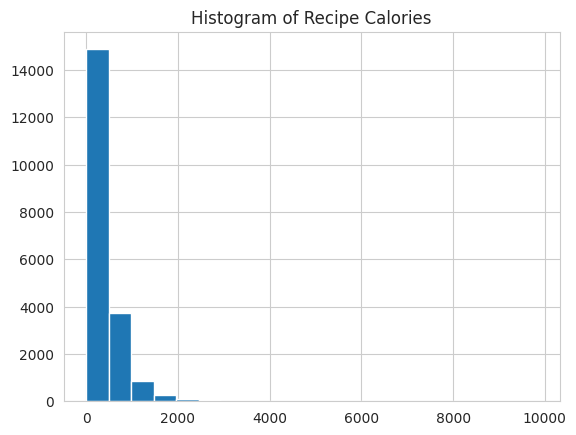

In [235]:

df.calories.hist(bins=20)
plt.title('Histogram of Recipe Calories')
plt.show()

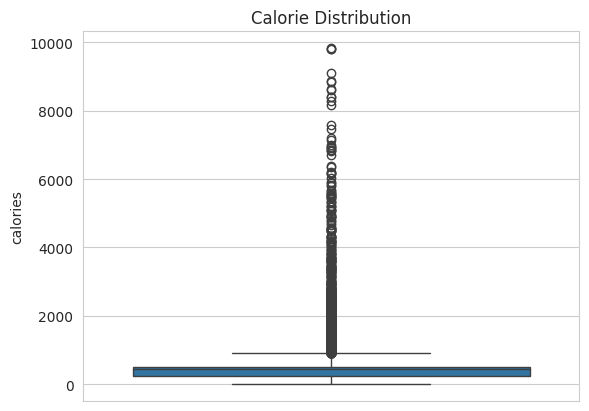

In [236]:
sns.set_style("whitegrid")
sns.boxplot(y=df['calories'])
plt.title("Calorie Distribution");

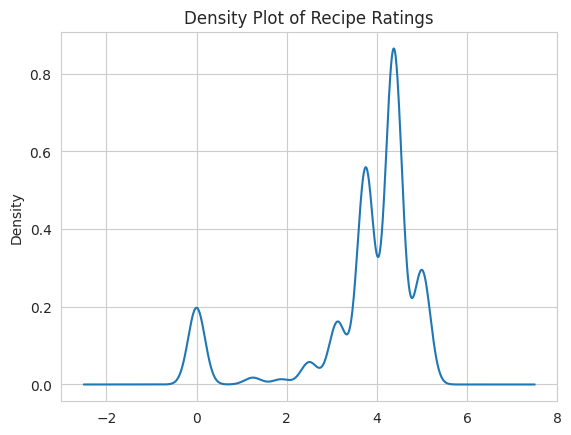

In [237]:
df['rating'].plot.kde()
plt.title('Density Plot of Recipe Ratings');

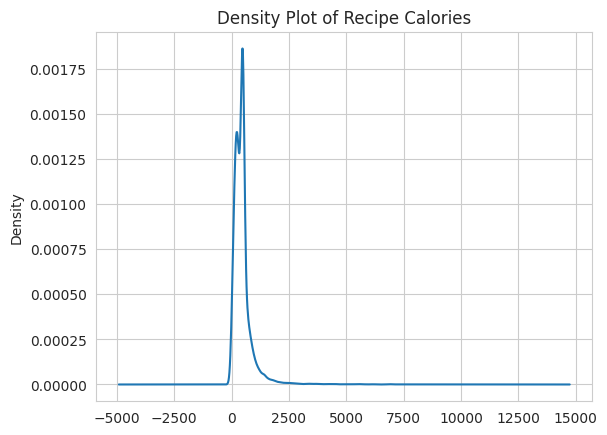

In [238]:
df['calories'].plot.kde()
plt.title('Density Plot of Recipe Calories');

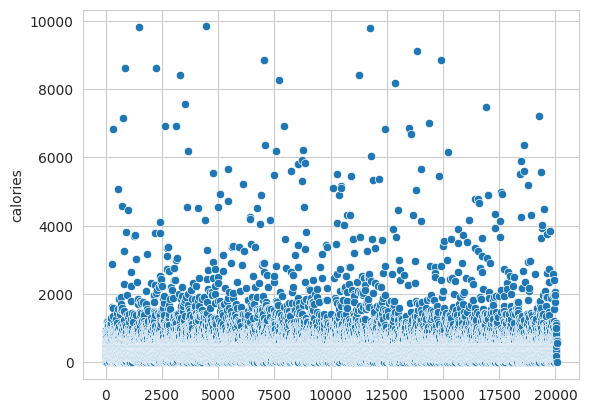

In [239]:
sns.scatterplot(df['calories']);

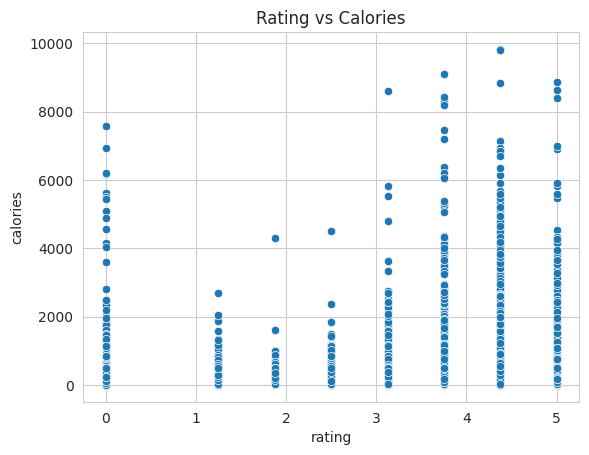

In [240]:
sns.scatterplot(x='rating', y='calories', data=df)
plt.title('Rating vs Calories');

To simplify the dataset, we will drop the columns which appear in less than 10% of the rows.

In [242]:
c=0
for col in df.iloc[:,6:].columns:
  if len(df[df[col]==1])<10:
    df=df.drop(col, axis=1)
    print(col,end=" ")
    c+=1
print(f'\nDropped {c} columns from the dataset')

#cakeweek #wasteless 30 days of groceries alabama alaska anthony bourdain apple juice arizona aspen atlanta australia beverly hills biscuit boston bran brooklyn brownie buffalo bulgaria burrito cambridge camping canada caviar chicago chili cobbler/crumble columbus cook like a diner cookbook critic costa mesa cranberry sauce crêpe cr��me de cacao cuba cupcake custard dallas denver digestif dominican republic dorie greenspan eau de vie egg nog egypt emeril lagasse england entertaining epi + ushg epi loves the microwave flat bread frankenrecipe freezer food friendsgiving frittata fritter germany grains grand marnier granola grappa guam haiti hamburger hawaii healdsburg hollywood house cocktail houston hummus iced coffee idaho illinois indiana iowa israel italy jamaica japan juicer kansas kansas city kentucky kitchen olympics labor day lancaster las vegas lasagna lingonberry london long beach louisiana louisville lychee macaroni and cheese maine marinade marscarpone marshmallow martini mea

## Creating a meal plan randomly

Here, we:

*   remove duplicates
*   find exclusive breakfast, lunch and dinner dishes


In [243]:
df.drop_duplicates(subset=['title'],inplace=True)
df.to_csv('epi_r_clean.csv',index=False)
df.shape

(17719, 513)

In [244]:
df_sorted=df.sort_values(by=['rating','calories'],ascending=[False, True])
df_sorted.reset_index(drop=True, inplace=True)
df_sorted.lunch.unique()

array([0., 1.])

In [245]:
lunch=df[df['lunch']==1.0]
lunch.shape

(1284, 513)

In [246]:
dinner=df[df['dinner']==1.0]
dinner.shape

(2532, 513)

In [247]:
breakfast=df[df['breakfast']==1.0]
breakfast.shape

(677, 513)

In [248]:
print(breakfast['title'].sample())
print(lunch['title'].sample())
print(dinner['title'].sample())

9915    Banana Bread 
Name: title, dtype: object
7352    Beefsteak Tomato, Butterhead Lettuce, and Baco...
Name: title, dtype: object
1769    Tamarind "Teriyaki" Chicken Skewers 
Name: title, dtype: object


## Finding vegetarian and non-vegetarian dishes and comparing their calories 🥦 🥗 🆚 🥩 🍤

In [249]:
veg=df[df['vegetarian']==1.0]
veg.shape

(6024, 513)

In [250]:
nonveg=df[df['vegetarian']==0.0]
nonveg.shape

(11695, 513)

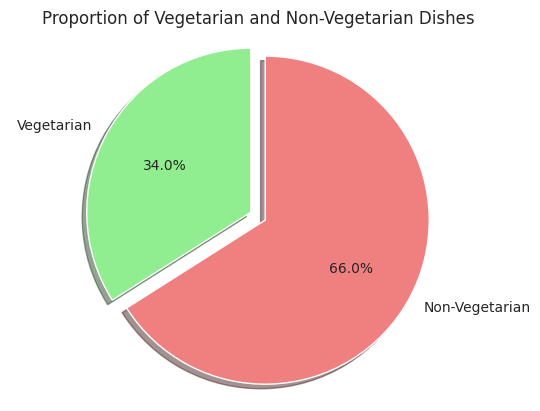

In [255]:
import matplotlib.pyplot as plt

veg_count = len(df[df['vegetarian'] == 1.0])
nonveg_count = len(df[df['vegetarian'] == 0.0])


labels = ['Vegetarian', 'Non-Vegetarian']
sizes = [veg_count, nonveg_count]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')#equal ratio
plt.title('Proportion of Vegetarian and Non-Vegetarian Dishes')
plt.show()


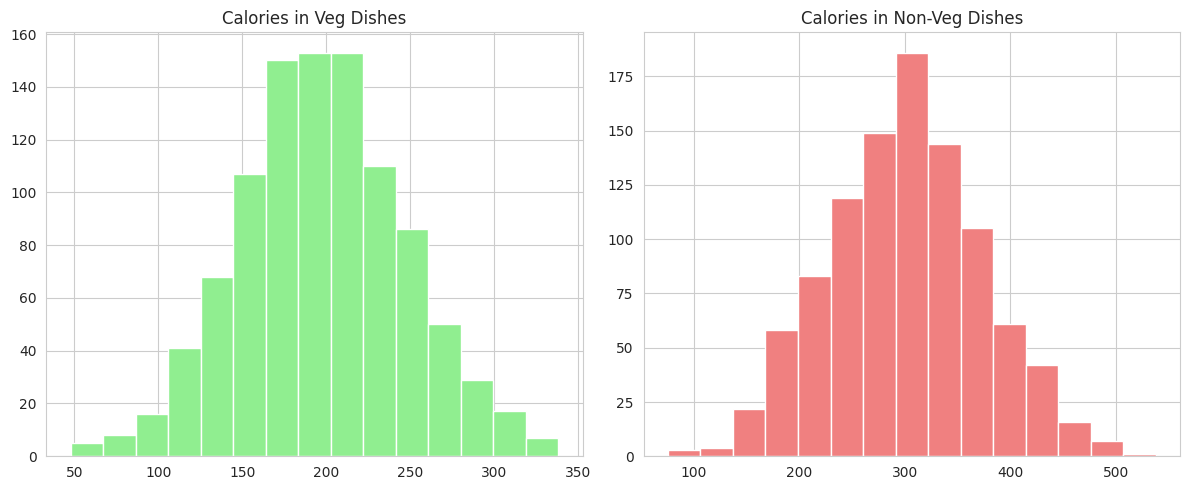

In [357]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
veg.calories.hist(bins=15, color='lightgreen')
plt.title('Calories in Veg Dishes')

plt.subplot(1, 2, 2)
nonveg.calories.hist(bins=15, color='lightcoral')
plt.title('Calories in Non-Veg Dishes')

plt.tight_layout()
plt.show()


## Combining the outcomes

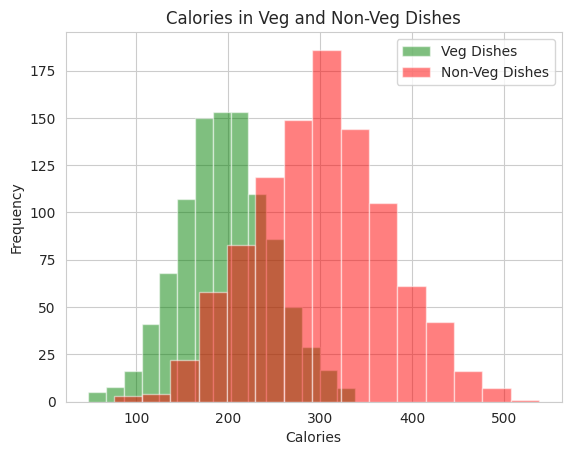

In [355]:
import matplotlib.pyplot as plt

# Create the histograms
plt.hist(veg.calories, bins=15, color='green', alpha=0.5, label='Veg Dishes')
plt.hist(nonveg.calories, bins=15, color='red', alpha=0.5, label='Non-Veg Dishes')

# Add titles and labels
plt.title('Calories in Veg and Non-Veg Dishes')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17719 entries, 0 to 20051
Columns: 513 entries, title to turkey
dtypes: float64(512), object(1)
memory usage: 69.5+ MB


# Comparing the distribution of non-dairy and dairy dishes for lactose intolerant consumers

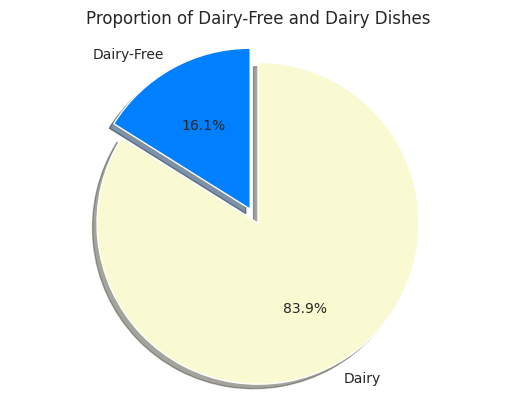

In [256]:
dairy_free_count = len(df[df['dairy free'] == 1.0])
dairy_count = len(df[df['dairy free'] == 0.0])


labels = ['Dairy-Free', 'Dairy']
sizes = [dairy_free_count, dairy_count]
colors = ['#007FFF', '#FAFAD2']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  #equal ratio
plt.title('Proportion of Dairy-Free and Dairy Dishes')
plt.show()


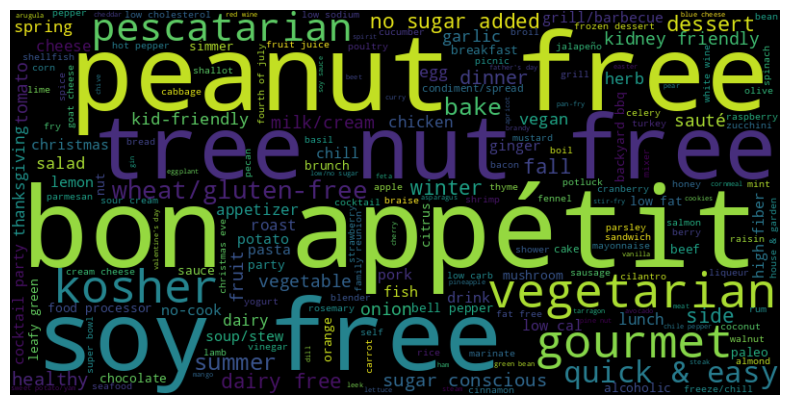

In [257]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(ingredient_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [258]:
df.head()

,title,rating,calories,protein,fat,sodium,22-minute meals,3-ingredient recipes,advance prep required,alcoholic,...,wild rice,wine,winter,wok,yellow squash,yogurt,zucchini,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.000000,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.000000,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.000000,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,487.900654,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.000000,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Correlation matrix of calories, rating, protein, fat and sodium

In [259]:
corr_mat=df.iloc[:,1:6].corr().abs()
corr_mat

,rating,calories,protein,fat,sodium
rating,1.000000,0.068513,0.085201,0.085210,0.022427
calories,0.068513,1.000000,0.695474,0.909408,0.221459
protein,0.085201,0.695474,1.000000,0.546601,0.344187
fat,0.085210,0.909408,0.546601,1.000000,0.141854
sodium,0.022427,0.221459,0.344187,0.141854,1.000000


## Hypothesis test for normality - *checking the ratings for normality*

In [260]:
R=df['rating'].values
R.shape, R

((17719,), array([2.5  , 4.375, 3.75 , ..., 4.375, 4.375, 4.375]))

## Shapiro - Wilk test

In [261]:
from scipy.stats import shapiro

stat,p=shapiro(R)
print(f'Statistics: stat={stat:.3f}, p={p:.3f}')

alpha=0.05
if p>alpha:
  print('Sample looks Gaussian (accept H0)')
else:
  print('Sample does not look Gaussian (reject H0)')

Statistics: stat=0.703, p=0.000
Sample does not look Gaussian (reject H0)


## D'Agostino's K-squared test - normality

In [262]:
from scipy.stats import normaltest

stat,p=normaltest(R)
print(f'Statistics: stat={stat:.3f}, p={p:.3f}')

alpha=0.05
if p>alpha:
  print('Sample looks Gaussian (accept H0)')
else:
  print('Sample does not look Gaussian (reject H0)')

Statistics: stat=6156.383, p=0.000
Sample does not look Gaussian (reject H0)


## Anderson - Darling test

In [263]:
from scipy.stats import anderson

result=anderson(R)
print(f'Statistics: stat={result.statistic:.3f}')

p=0
for i in range(len(result.critical_values)):
  sl,cv=result.significance_level[i],result.critical_values[i]
  if result.statistic<cv:
    print(f'Sample looks Gaussian at {sl*100}% confidence (accept H0)')
  else:
    print(f'Sample does not look Gaussian at {sl*100}% confidence (reject H0)')

Statistics: stat=1942.052
Sample does not look Gaussian at 1500.0% confidence (reject H0)
Sample does not look Gaussian at 1000.0% confidence (reject H0)
Sample does not look Gaussian at 500.0% confidence (reject H0)
Sample does not look Gaussian at 250.0% confidence (reject H0)
Sample does not look Gaussian at 100.0% confidence (reject H0)


## Checking if calories are normally distributed


#### D'Agostino's K-squared test - normality





In [264]:
C=df['calories'].values

In [265]:
stat,p=normaltest(C)
print(f'Statistics: stat={stat:.3f}, p={p:.3f}')

Statistics: stat=22070.480, p=0.000


In [266]:
alpha=0.05
if p>alpha:
  print('Sample looks Gaussian (accept H0)')
else:
  print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


In [267]:
df.protein.describe()

,protein
count,14021.000000
mean,22.357892
std,43.547673
min,0.000000
25%,3.000000
50%,9.000000
75%,29.000000
max,1625.000000


In [268]:
df.protein.isnull().sum()

3698

In [269]:
protein_mean=df.protein.mean()
print(protein_mean)

df.protein.fillna(protein_mean, inplace=True)

df.protein.isnull().sum()

22.35789173382783


0

In [270]:
P=df['protein'].values
P

array([30., 18.,  6., ..., 31., 45., 73.])

##  Shapiro - Wilk test

In [271]:
stat,p=shapiro(P)
print(f'Statistics: stat={stat:.3f}, p={p:.3f}')

alpha=0.05
if p>alpha:
  print('Sample looks Gaussian (accept H0)')
else:
  print('Sample does not look Gaussian (reject H0)')


Statistics: stat=0.412, p=0.000
Sample does not look Gaussian (reject H0)


## D'Agostino's K-squared test - normality

In [272]:
stat,p=normaltest(P)
print(f'Statistics: stat={stat:.3f}, p={p:.3f}')

alpha=0.05
if p>alpha:
  print('Sample looks Gaussian (accept H0)')
else:
  print('Sample does not look Gaussian (reject H0)')

Statistics: stat=32593.594, p=0.000
Sample does not look Gaussian (reject H0)


## Spearman's Rank /correlation test


In [273]:
from scipy.stats import spearmanr

data1=df.calories.values
data2=df.protein.values

stat,p=spearmanr(data1,data2)
print(f'Statistics: stat={stat:.3f}, p={p:.3f}')

if p>0.05:
  print('Probably independent')
else:
  print('Probably dependent')

Statistics: stat=0.773, p=0.000
Probably dependent


## Correlation Tests


In [274]:
from scipy.stats import pearsonr

X=df['calories'].values
Y=df['protein'].values

stat,p=pearsonr(X,Y)
print(f'Statistics: stat={stat:.3f}, p={p:.3f}')

Statistics: stat=0.695, p=0.000


In [275]:
df.columns

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium',
       '22-minute meals', '3-ingredient recipes', 'advance prep required',
       'alcoholic',
       ...
       'wild rice', 'wine', 'winter', 'wok', 'yellow squash', 'yogurt',
       'zucchini', 'snack', 'snack week', 'turkey'],
      dtype='object', length=513)

In [276]:
df.fat=df.fat.fillna(df.fat.mean())
df.fat.isnull().sum()

0

In [277]:
X=df['calories'].values
Y=df['fat'].values

stat,p=pearsonr(X,Y)
print(f'Statistics: stat={stat:.3f}, p={p:.3f}')

Statistics: stat=0.909, p=0.000


## Visualization to Observe Relationships

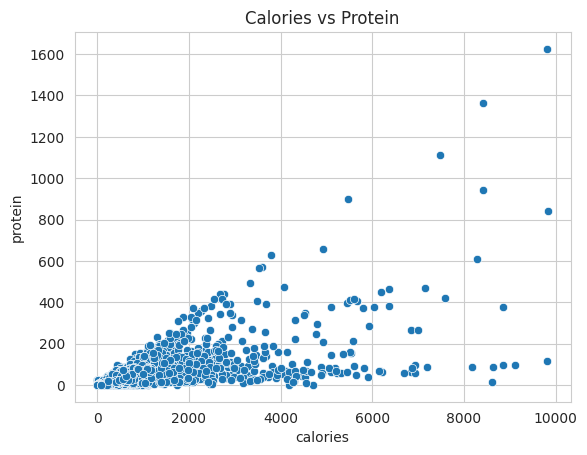

In [278]:
sns.scatterplot(x='calories', y='protein', data=df)
plt.title('Calories vs Protein');

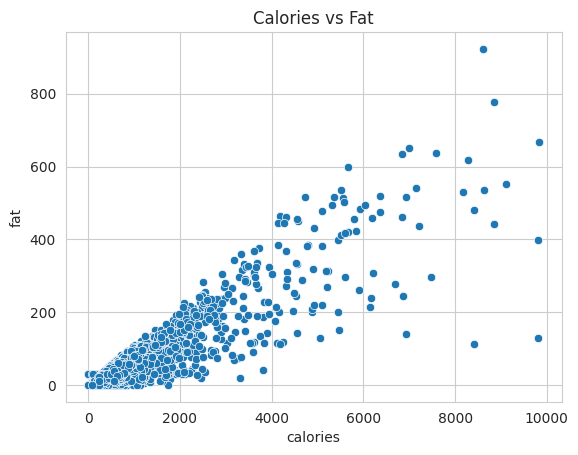

In [279]:
sns.scatterplot(data=df,x='calories',y='fat')
plt.title('Calories vs Fat');

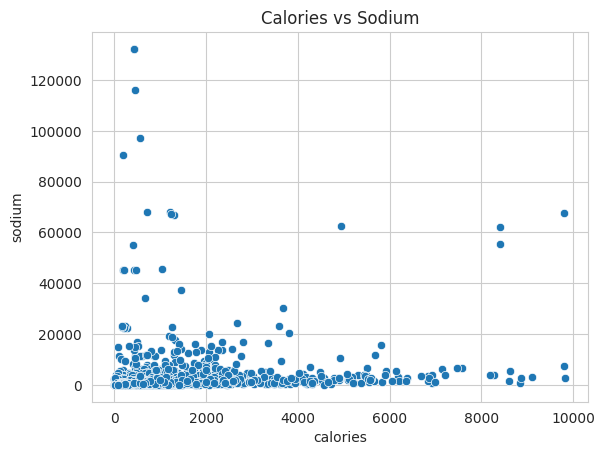

In [280]:
sns.scatterplot(data=df,x='calories',y='sodium')
plt.title('Calories vs Sodium');

## Regression Analysis

In [281]:
def estimate_coef(x,y):
  n=np.size(x)

  m_x,m_y=np.mean(x),np.mean(y)

  SS_xy=np.sum(y*x)-n*m_y*m_x
  SS_xx=np.sum(x*x)-n*m_x*m_x


  b_1=SS_xy/SS_xx
  b_0=m_y-b_1*m_x

  return (b_0,b_1)

def plot_regression_line(x,y,b):

  plt.scatter(x,y,color='m',marker='o',s=30)

  y_pred=b[0]+b[1]*x

  plt.plot(x,y_pred,color='g')

  plt.xlabel('x')
  plt.ylabel('y')

  plt.show()

In [282]:
def abc(x,y):
  b=estimate_coef(x,y)

  plot_regression_line(x,y,b)

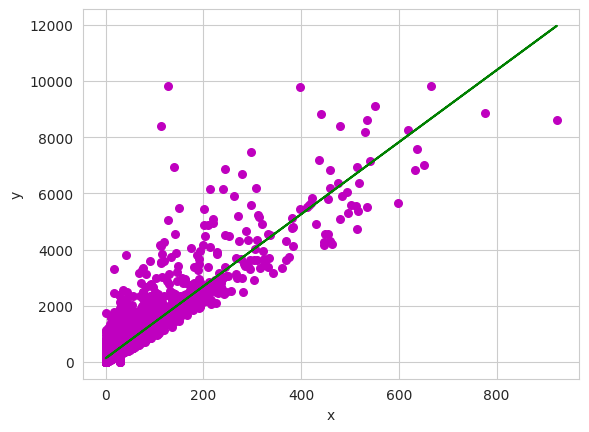

In [283]:
fat_x=df.fat.values
cal_y=df.calories.values

abc(fat_x,cal_y)

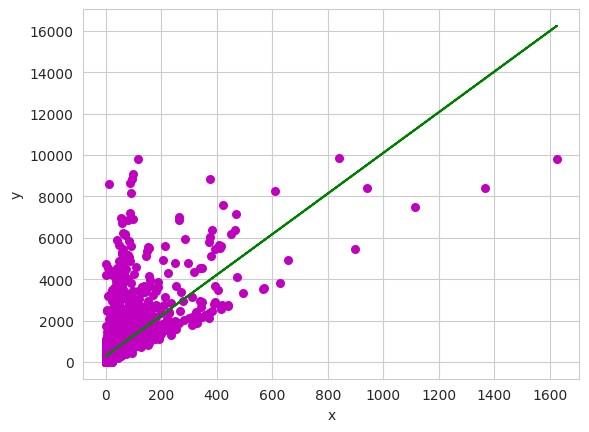

In [284]:
prot_x=df.protein.values
abc(prot_x,cal_y)

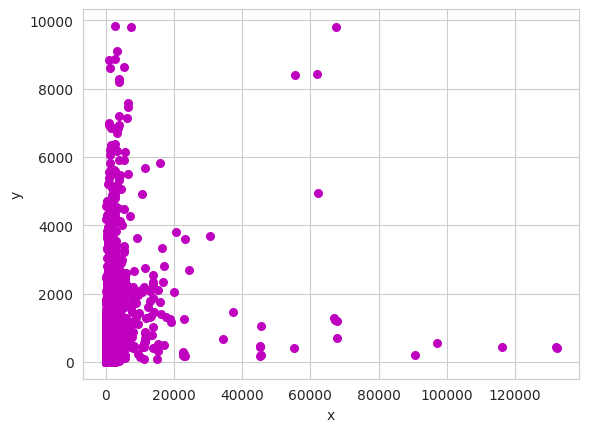

In [285]:
sod=df.sodium.values
abc(sod,cal_y)

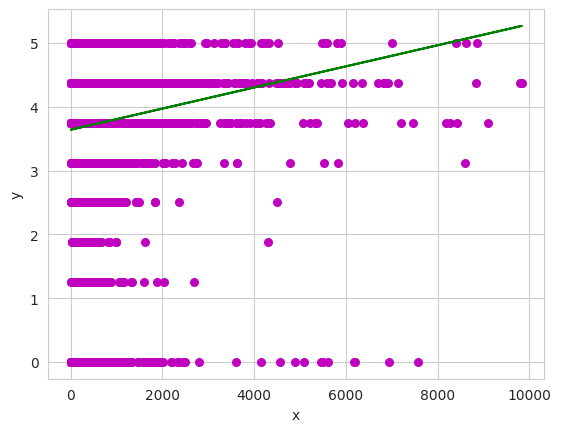

In [286]:
rat_x=df.rating.values
abc(cal_y,rat_x)

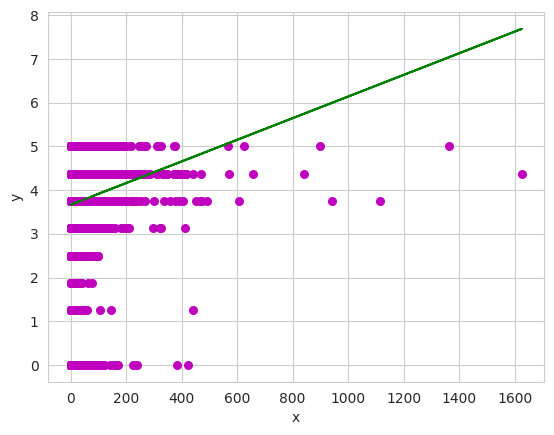

In [287]:
abc(prot_x,rat_x)

## Standardize rating with other features to bring them onto the same scale

In [288]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [289]:
df_std=df[['rating','protein']]
df_std.head()

,rating,protein
0,2.500,30.000000
1,4.375,18.000000
2,3.750,6.000000
3,5.000,22.357892
4,3.125,20.000000


In [290]:
std=StandardScaler()
stand=std.fit_transform(df_std)
stand

array([[-0.92602312,  0.19728489],
       [ 0.49361727, -0.11250118],
       [ 0.02040381, -0.42228725],
       ...,
       [ 0.49361727,  0.2231004 ],
       [ 0.49361727,  0.58451748],
       [ 0.49361727,  1.30735164]])

In [291]:
df_std=pd.DataFrame(stand,columns=['rating','protein'])
df_std.head()

,rating,protein
0,-0.926023,0.197285
1,0.493617,-0.112501
2,0.020404,-0.422287
3,0.966831,0.000000
4,-0.452810,-0.060870


In [292]:
df_std.rename({0:'rating',1:'protein'}, inplace=True, axis=1)
df_std.head()

,rating,protein
0,-0.926023,0.197285
1,0.493617,-0.112501
2,0.020404,-0.422287
3,0.966831,0.000000
4,-0.452810,-0.060870


In [293]:
df_std['rating']=df_std['rating'].abs()
df_std['protein']=df_std['protein'].abs()

df_std.head()

,rating,protein
0,0.926023,0.197285
1,0.493617,0.112501
2,0.020404,0.422287
3,0.966831,0.000000
4,0.452810,0.060870


In [294]:
corr_matrix=df_std.iloc[:,:].corr().abs()
corr_matrix

,rating,protein
rating,1.000000,0.012211
protein,0.012211,1.000000


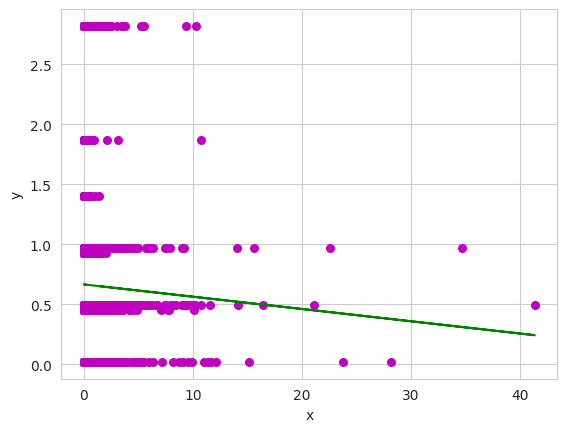

In [295]:
std_prot=df_std['protein'].values
std_rat=df_std['rating'].values

abc(std_prot,std_rat)

## ML Model

In [296]:
df_final1=df.drop(columns=['title','rating','sodium'])
df_final2=df.drop(columns=['title','rating','sodium'])
col1=['calories','protein','fat']
df_final1.head()

,calories,protein,fat,22-minute meals,3-ingredient recipes,advance prep required,alcoholic,almond,amaretto,anchovy,...,wild rice,wine,winter,wok,yellow squash,yogurt,zucchini,snack,snack week,turkey
0,426.000000,30.000000,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,403.000000,18.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,165.000000,6.000000,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,487.900654,22.357892,28.897872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,547.000000,20.000000,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [297]:
sc=StandardScaler()
df_final=sc.fit_transform(df_final1.iloc[:,[0,1,2]])
df_final

array([[-0.13910783,  0.19728489, -0.56477396],
       [-0.1811605 , -0.11250118, -0.15211361],
       [-0.61631424, -0.42228725, -0.56477396],
       ...,
       [ 0.11137982,  0.2231004 ,  0.23475546],
       [ 0.23570946,  0.58451748, -0.12632234],
       [ 0.10589469,  1.30735164, -0.48740015]])

In [298]:
df_final=pd.DataFrame(df_final,columns=col1)
df_final.join(df_final1.iloc[:,3:])

,calories,protein,fat,22-minute meals,3-ingredient recipes,advance prep required,alcoholic,almond,amaretto,anchovy,...,wild rice,wine,winter,wok,yellow squash,yogurt,zucchini,snack,snack week,turkey
0,-0.139108,0.197285,-0.564774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.181161,-0.112501,-0.152114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.616314,-0.422287,-0.564774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.025930,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.082126,-0.060870,0.080008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17714,0.906724,0.842673,1.317989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17715,0.308845,-0.009239,-0.023157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17716,0.111380,0.223100,0.234755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17717,0.235709,0.584517,-0.126322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [299]:
X=df_final.iloc[:,[1,2]]
y=df_final.iloc[:,0]

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [300]:
from sklearn.svm import LinearSVR

model=LinearSVR(C=0.1)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
score=model.score(X_test,y_test)*100
score

87.50565958338605

In [301]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor

regressor=RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
score=regressor.score(X_test,y_test)*100
score

85.46213530441283

In [302]:
rmse=sqrt(mean_squared_error(y_test,y_pred))
rmse

0.36223043139987815

In [303]:
df.head()

,title,rating,calories,protein,fat,sodium,22-minute meals,3-ingredient recipes,advance prep required,alcoholic,...,wild rice,wine,winter,wok,yellow squash,yogurt,zucchini,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.000000,30.000000,7.000000,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.000000,18.000000,23.000000,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.000000,6.000000,7.000000,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,487.900654,22.357892,28.897872,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.000000,20.000000,32.000000,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Linear Regression and Regularization

In [304]:
df2=preprocessing.scale(df[['calories','protein','fat']])
df2=pd.DataFrame(df2,columns=col1)
df2

,calories,protein,fat
0,-0.139108,0.197285,-0.564774
1,-0.181161,-0.112501,-0.152114
2,-0.616314,-0.422287,-0.564774
3,-0.025930,0.000000,0.000000
4,0.082126,-0.060870,0.080008
...,...,...,...
17714,0.906724,0.842673,1.317989
17715,0.308845,-0.009239,-0.023157
17716,0.111380,0.223100,0.234755
17717,0.235709,0.584517,-0.126322


In [305]:
X=df2.iloc[:,[1,2]]
y=df2.iloc[:,0]

X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [306]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [307]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)
print('INTERCEPT: ',reg.intercept_)
print('COEFFICIENT: ',reg.coef_)

y_pred=reg.predict(X_test)

INTERCEPT:  0.0021906267858340985
COEFFICIENT:  [0.29137318 0.75365159]


In [308]:
from sklearn.metrics import r2_score
from sklearn import metrics

print('R2 Score: ',r2_score(y_test,y_pred))
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R2 Score:  0.878638198081306
Mean Absolute Error:  0.16204610422000076
Mean Squared Error:  0.1095345831098952
Root Mean Squared Error:  0.3309600929264663


In [309]:
score=reg.score(X_test,y_test)*100
score

87.8638198081306

## Regularization - ` to prevent overfitting `


> 1.RIDGE

In [310]:
from sklearn.linear_model import Ridge

ridge=Ridge(alpha=0) # alpha = 0 gives a better value
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)

In [311]:
print('R2 Score: ',r2_score(y_test,y_pred))
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R2 Score:  0.8786381980813062
Mean Absolute Error:  0.16204610422000087
Mean Squared Error:  0.10953458310989507
Root Mean Squared Error:  0.3309600929264661


> 2. LASSO

In [312]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha=0)
lasso.fit(X_train,y_train)
print(lasso.coef_)
y_p1=lasso.predict(X_test)

[0.29137318 0.75365159]


In [313]:
print('R2 Score: ',r2_score(y_test,y_p1))
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_p1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_p1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_p1)))

R2 Score:  0.878638198081306
Mean Absolute Error:  0.16204610422000085
Mean Squared Error:  0.10953458310989518
Root Mean Squared Error:  0.3309600929264663


## Creating a new DataFrame which counts the number of ingredients in a dish

In [314]:
df_new=pd.read_csv('epi_r.csv')
df_new.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [315]:
df3 = df_new.iloc[:, :9]
df3.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0


In [316]:
df_new = df.iloc[:, [0] + list(range(9, len(df.columns)))]

df_new['ingredients'] = df_new.iloc[:, 1:].sum(axis=1)

df_new['ingredients_list'] = df_new.apply(lambda row: ', '.join(row.index[row == 1]), axis=1)

df_new = df_new.rename(columns={'title': 'title', 'ingredients': 'no_of_ingredients'})

df_new = df_new[['title', 'ingredients_list', 'no_of_ingredients']]

df_new.tail()
# this dataframe contains the title of the dish, the list of ingredients and the number of ingredients

,title,ingredients_list,no_of_ingredients
20046,Chinese Barbecued Spareribs,"appetizer, bake, dairy free, fall, honey, hous...",12.0
20048,Artichoke and Parmesan Risotto,"artichoke, bon appétit, dinner, high fiber, ki...",16.0
20049,Turkey Cream Puff Pie,"bake, dinner, fall, gourmet, kid-friendly, no ...",15.0
20050,Snapper on Angel Hair with Citrus Cream,"bon appétit, citrus, dairy, fish, garlic, milk...",13.0
20051,Baked Ham with Marmalade-Horseradish Glaze,"bake, bon appétit, christmas, ham, pork, roast...",7.0


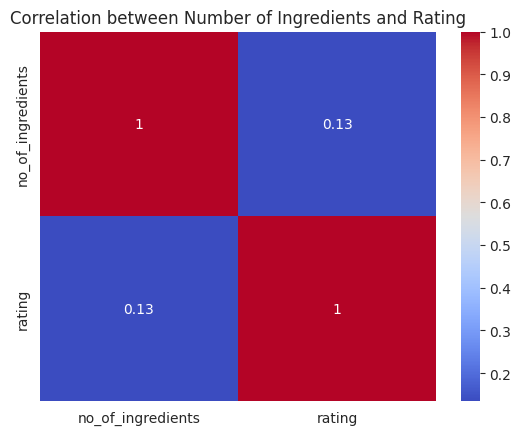

In [317]:
df_new['rating'] = df3['rating']

corr_matrix = df_new[['no_of_ingredients', 'rating']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Number of Ingredients and Rating')
plt.show()


*from the above map, we can observe that-*

**The heatmap shows that there’s a weak correlation (0.13) between the number of ingredients and the rating, while the correlation of each with itself is always 1.**

In [318]:
import plotly.express as px

fig = px.scatter(df_new, x='no_of_ingredients', y='rating',
                 trendline='ols',
                 title='Scatter Plot: Number of Ingredients vs Rating',
                 labels={'no_of_ingredients':'Number of Ingredients', 'rating':'Rating'},
                 template='plotly_dark',
                 color_discrete_sequence=['#FF6347'],
    trendline_color_override='cyan' )

fig.show()
#in the below plot, we can see that the blue line indicates the overall trend in the ratings given the number of ingredients
#you can hover over each point to see the individual data points

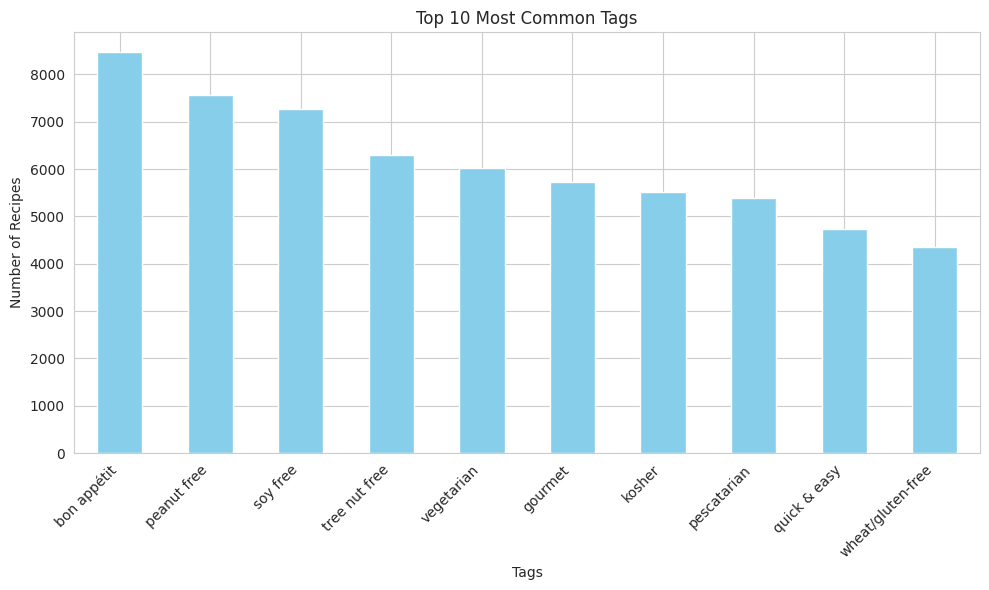

In [319]:
import matplotlib.pyplot as plt

ingredient_counts = df.iloc[:, 9:].sum()

ingredient_counts_sorted = ingredient_counts.sort_values(ascending=False)


top_10_ingredients = ingredient_counts_sorted[:10]

plt.figure(figsize=(10, 6))
top_10_ingredients.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Tags')
plt.xlabel('Tags')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [320]:
df=pd.read_csv('epi_r.csv')# re-uploading the dataset due to technical issues with jupyter

# Dish Type Decomposition for Restaurant Menus

In [322]:
import plotly.graph_objects as go


categories = ['Appetizer', 'Main Course', 'Dessert']
dairy_free = [15, 40, 10]
dairy = [15, 30, 10]

fig = go.Figure()
fig.add_trace(go.Bar(x=categories, y=dairy_free, name='Dairy-Free', marker_color='lightblue'))
fig.add_trace(go.Bar(x=categories, y=dairy, name='Dairy', marker_color='salmon'))

fig.update_layout(barmode='stack', title='Dish Type Composition: Dairy-Free vs. Dairy',
                  xaxis_title='Dish Type', yaxis_title='Count')
fig.show()


In [323]:
import plotly.graph_objects as go

categories = ['22-minute meals', '3-ingredient recipes', 'advance prep required']
dairy_free_counts = [len(df[df['22-minute meals'] == 1]),
                     len(df[df['3-ingredient recipes'] == 1]),
                     len(df[df['advance prep required'] == 1])]

fig = go.Figure()
fig.add_trace(go.Bar(x=categories, y=dairy_free_counts, marker_color='#228b22'))

fig.update_layout(
    title='Count of Dishes by Recipe Type',
    xaxis_title='Recipe Type',
    yaxis_title='Count',
    xaxis=dict(tickvals=categories, ticktext=categories),
    yaxis=dict(title='Count')
)
fig.show()


* From the above graph, we can observe that only a small portion of simple recipes are constituted in this dataset.
* A mojority of the dishes require advanced prep and skills to prepare.
* Not very mindful of college students like me.😁

In [334]:
df=pd.read_csv('epi_r.csv')

25

# Plotting the distribution of *holiday dishes* across major celebrating countries by count 🌏

# 🪔 🧧 🕌 🕎 ==  ？


In [336]:
diwali_count = df[df['diwali'] == 1].shape[0]
lunar_new_year_count = df[df['lunar new year'] == 1].shape[0]
ramadan_count = df[df['ramadan'] == 1].shape[0]
hanukkah_count = df[df['hanukkah'] == 1].shape[0]

In [337]:
diwali_count,lunar_new_year_count,ramadan_count,hanukkah_count


(25, 46, 39, 118)

In [343]:
import plotly.express as px
import pandas as pd


data = {
    'Country':[
        'India', 'Nepal', 'Sri Lanka',  # Diwali
        'China', 'Taiwan', 'Hong Kong', 'Macau',  # LunarNewYear
        'Saudi Arabia', 'Egypt', 'Turkey', 'Pakistan', 'Iran', 'Indonesia', 'Malaysia', 'Jordan', 'Qatar', 'United Arab Emirates',  # Ramadan
        'Israel', 'United States', 'Canada'  # Hanukkah
    ],
    'Holiday':[
        'Diwali', 'Diwali', 'Diwali',
        'Lunar New Year', 'Lunar New Year', 'Lunar New Year', 'Lunar New Year',
        'Ramadan', 'Ramadan', 'Ramadan', 'Ramadan', 'Ramadan', 'Ramadan', 'Ramadan', 'Ramadan', 'Ramadan', 'Ramadan',
        'Hanukkah', 'Hanukkah', 'Hanukkah'
    ],
    'Dishes':[
        diwali_count, diwali_count, diwali_count,
        lunar_new_year_count, lunar_new_year_count, lunar_new_year_count, lunar_new_year_count,
        ramadan_count, ramadan_count, ramadan_count, ramadan_count, ramadan_count, ramadan_count, ramadan_count, ramadan_count, ramadan_count, ramadan_count,  # Ramadan
        hanukkah_count, hanukkah_count, hanukkah_count
    ]
}


df = pd.DataFrame(data)

df_agg = df.groupby('Country').agg({'Dishes': 'sum', 'Holiday': lambda x: ', '.join(x)}).reset_index()

fig = px.choropleth(
    df_agg,
    locations="Country",
    locationmode="country names",
    color="Dishes",
    color_continuous_scale="ylgnbu",
    title="Number of Dishes by Holiday",
    labels={'Dishes': 'Number of Dishes'},
    hover_name="Holiday",
    hover_data={"Dishes": True, "Holiday": True}
)

fig.update_geos(
    scope="world",
    projection_type="mercator",
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="LightGray",
    showocean=True,
    oceancolor="LightBlue",
)

fig.update_layout(
    title="Global Distribution of Dishes by Holiday",
    coloraxis_colorbar_title="Number of Dishes",
    margin={"r":0,"t":50,"l":0,"b":0}
)
fig.show()

# in the plot below only a few majoritarian countries were taken into account for each of the festivals


---